In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from itertools import combinations
pd.set_option("display.max_columns", 37)
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

# Inicializando o Dataset

Baixe o arquivo .csv disponível no [Kaggle](https://www.kaggle.com/datasets/justinas/nba-players-data/) e execute o notebook. 

Certifique de ter instalado todas as dependências: 

```pip install pandas numpy matplotlib seaborn```

In [14]:
df = pd.read_csv("all_seasons.csv")

## Sumário

+ player_name: **Nome do jogador**
+ team_abbreviation: **Abreviação do nome do time**
+ age: **Idade do jogador**
+ player_height: **Altura (cm)**
+ player_weight: **Peso (kg)**
+ college: **Universidade frequentada**
+ country: **País de origem**
+ draft_year: **Ano que o jogador foi escolhido no _draft_**
+ draft_round: **Rodada do _draft_ que foi escolhido**
+ draft_number: **Posição no _draft_**
+ gp: **Jogos jogados**
+ pts: **Média de pontos**
+ reb: **Média de rebotes pegos**
+ ast: **Média de assistências**
+ net_rating: **Rendimento da equipe a cada 100 posses**
+ oreb_pct: **Porcentagem de rebotes agressivos que o jogador pegou**
+ dreb_pct: **Porcentagem de rebotes defensivos que o jogador pegou**
+ usg_pct: **Porcentagem de jogadas em equipe feitas pelo jogador**
+ ts_pct: **Medida de eficiência no arremesso**
+ ast_pct: **Porcentagem de assistências que resultaram em cesta**
+ season: **Temporada da NBA**

### Limpeza de Dados

O Dataset não apresentou nenhuma necessidade gritante de limpeza de dados, apenas foi retirado a coluna "Unnamed: 0", arredondado o número de casas decimais do peso dos jogadores para .2.

In [15]:
df = df.drop(columns="Unnamed: 0")
df['player_weight'] = df['player_weight'].apply(round, ndigits=2)
df.head(5)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.80,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.18,Northwestern Oklahoma,USA,1994,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.42,North Carolina,USA,1993,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.06,Florida State,USA,1989,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.75,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


### Medidas de Centralidade e Dispersão

In [16]:
df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,27.045313,200.555097,100.263027,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,4.339211,9.111090,12.426736,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,18.000000,160.020000,60.330000,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.720000,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,26.000000,200.660000,99.790000,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,30.000000,208.280000,108.860000,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,44.000000,231.140000,163.290000,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


### Boxplots

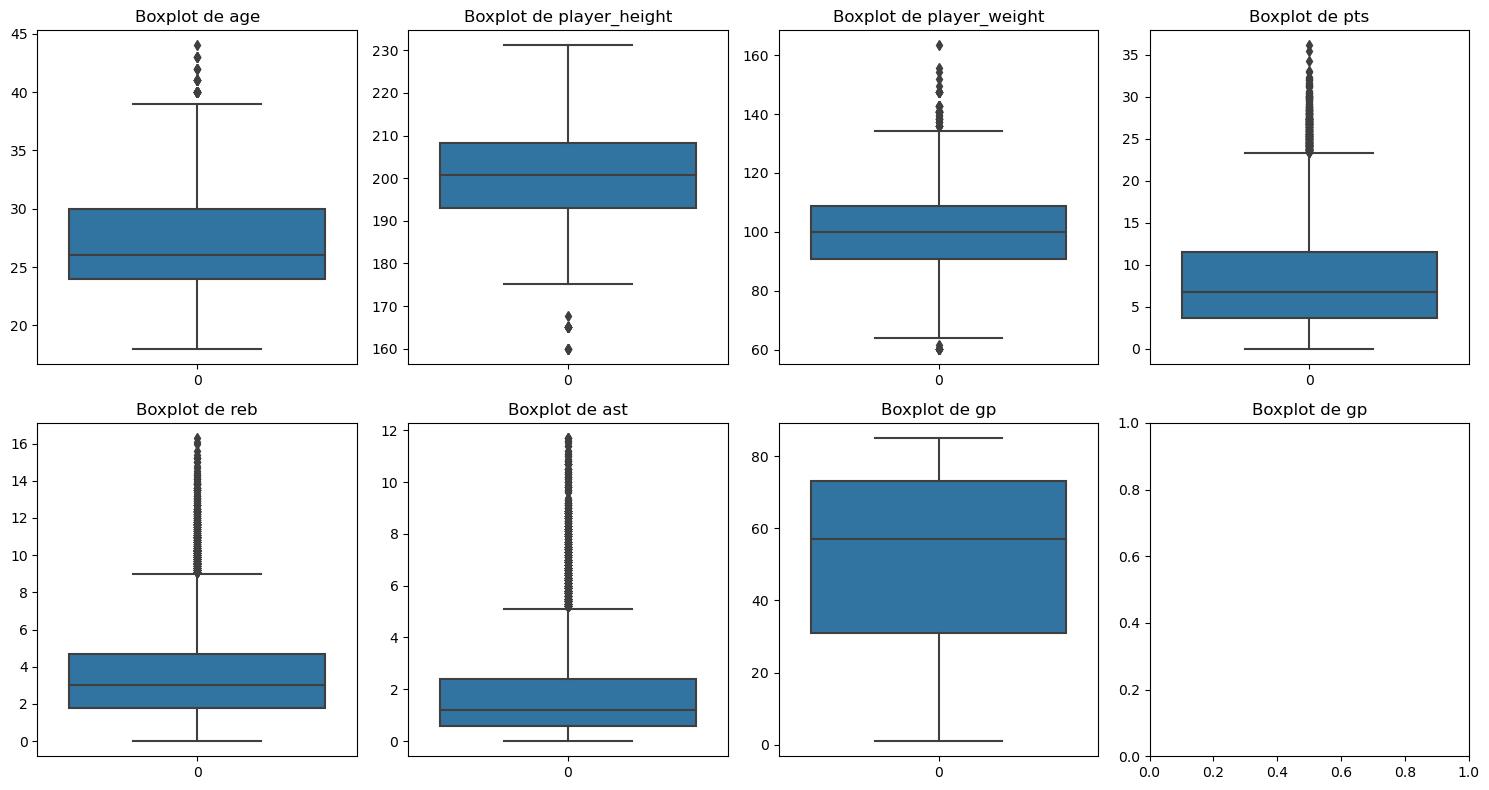

In [17]:
selected = ["age","player_height", "player_weight","pts", "reb", "ast","gp"]

fig, axs = plt.subplots(2, 4, figsize=(15, 8))


for i, x in enumerate(selected):

  r = i // 4
  c = i % 4

  sns.boxplot(data=df[x], ax=axs[r, c])
  plt.title(f"Boxplot de {x}")
  axs[r, c].set_title(f'Boxplot de {x}')

plt.tight_layout()
plt.show() 

### Gráficos

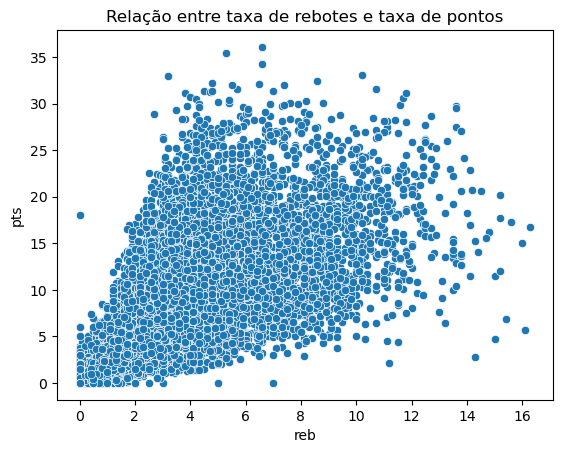

In [18]:
sns.scatterplot(data=df, x="reb", y="pts")
plt.title("Relação entre taxa de rebotes e taxa de pontos")
plt.show()

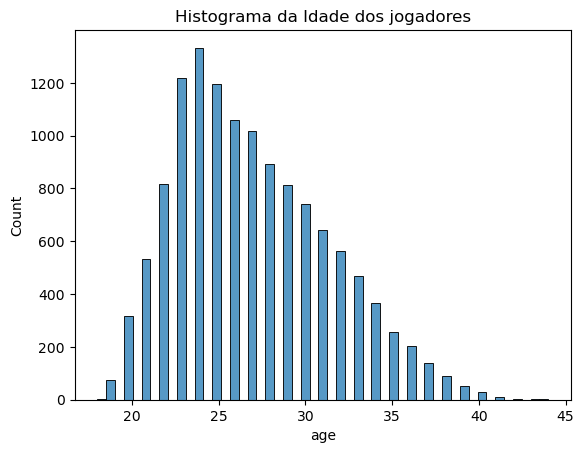

In [19]:
sns.histplot(data=df, x="age")
plt.title("Histograma da Idade dos jogadores")
plt.show()

In [20]:
dfhandle = df.groupby("team_abbreviation")["pts"].mean().to_dict()
df['team_pts_mean'] = df['team_abbreviation'].map(dfhandle)
df['team_pts_mean'] = df['team_pts_mean'].apply(round, ndigits=2)

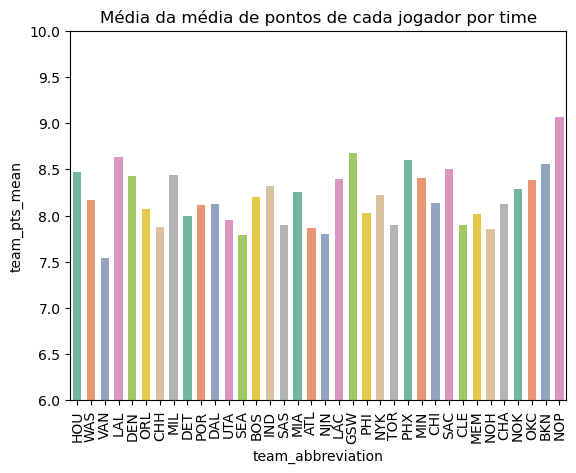

In [21]:
sns.barplot(df, x="team_abbreviation", y="team_pts_mean",  palette='Set2', dodge=True, width=0.6)  
plt.ylim(6, 10)
plt.xticks(rotation=90)
plt.title("Média da média de pontos de cada jogador por time")
plt.show()

### Agrupamento e K-means

Realizamos gráficos de agrupamento utilizando o k-means entre as colunas de: Altura, Média de Pontos, Taxa de Rebotes e Taxa de Assistências para valores de K = 3 e K = 4.


+ Com os agrupamentos é possível realizar algumas análises como: 
  + É possível separar em grupos o "porte" físico dos atletas, desde atletas mais baixos (e assim mais magros) a atletas maiores que têm mais massa. E com isso, pode-se verificar que o 1º grupo tende a ter mais sucessos em assistências e mais falhas em pegar rebotes, fato que ocorre de maneira contrária no 2º grupo. Grupos que se encontram entre esses dois grupos "extremistas" tendem a ter resultados parecidos em relação as suas taxas de assistência e rebote.


  + Não foi possível responder diretamente nenhuma pergunta apenas com o agrupamento de dados.

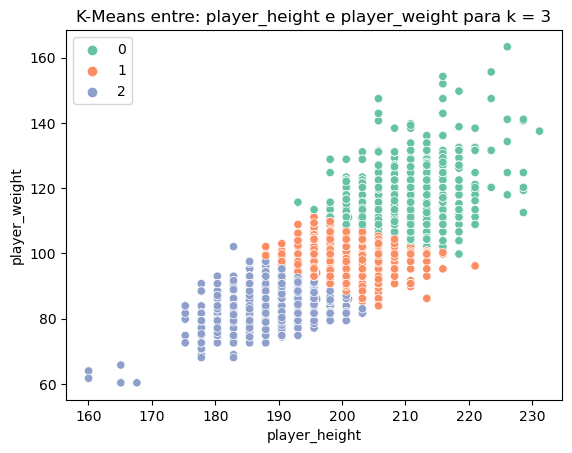

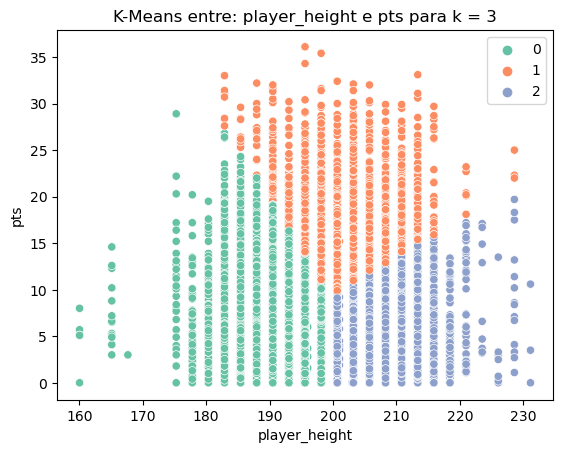

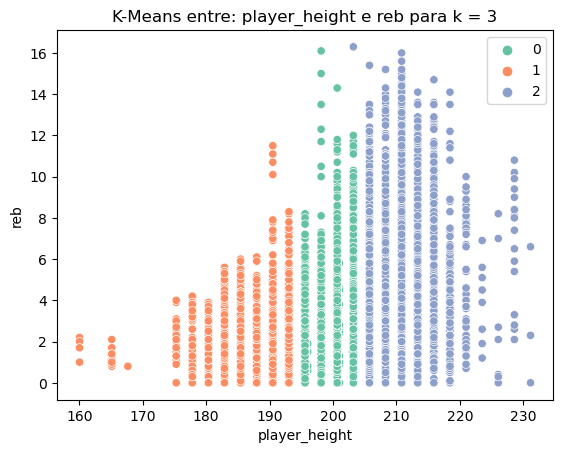

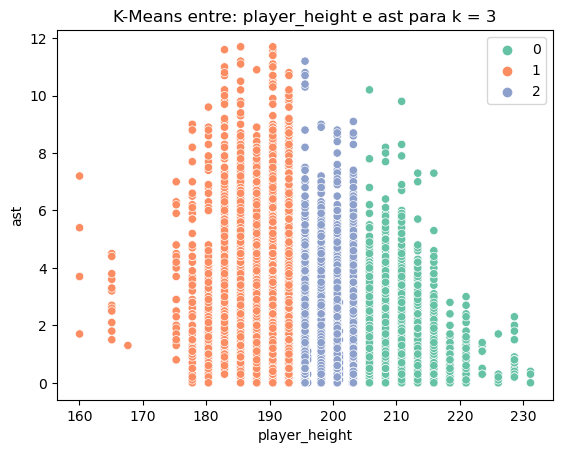

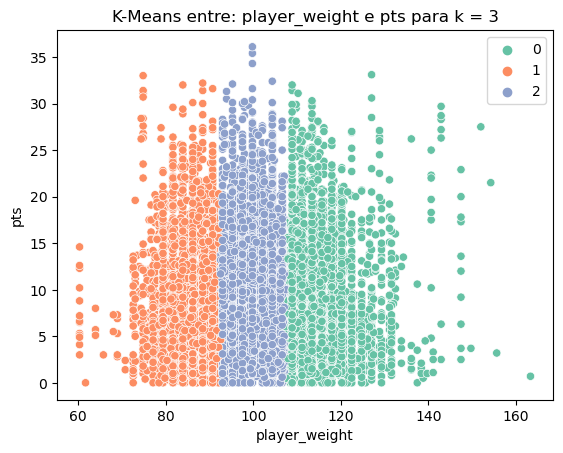

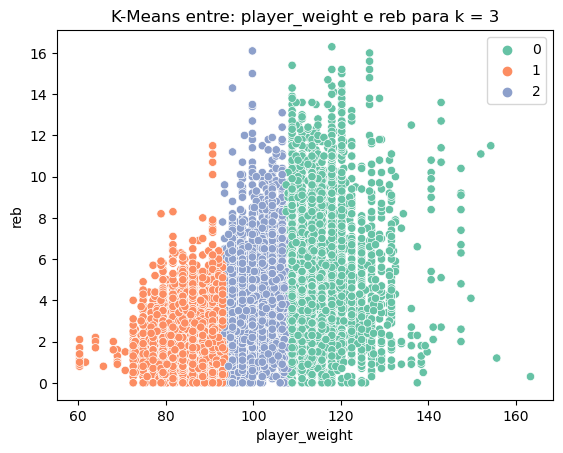

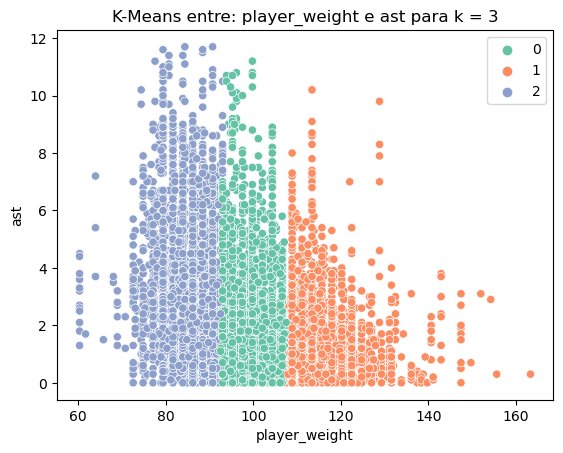

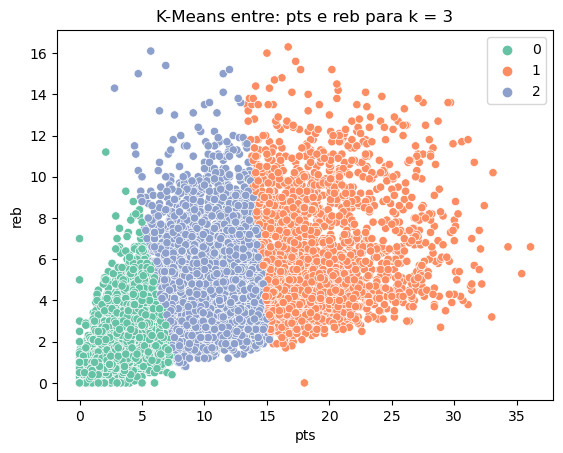

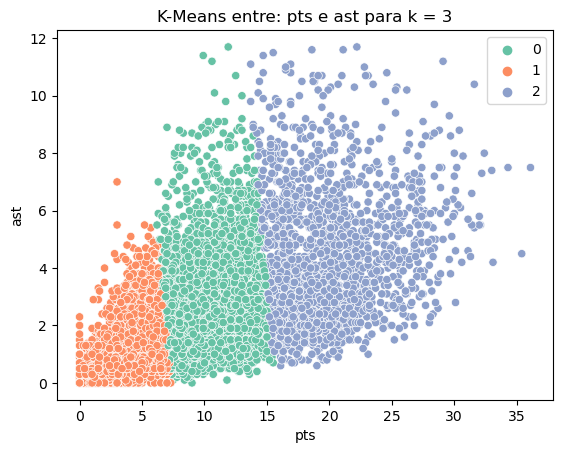

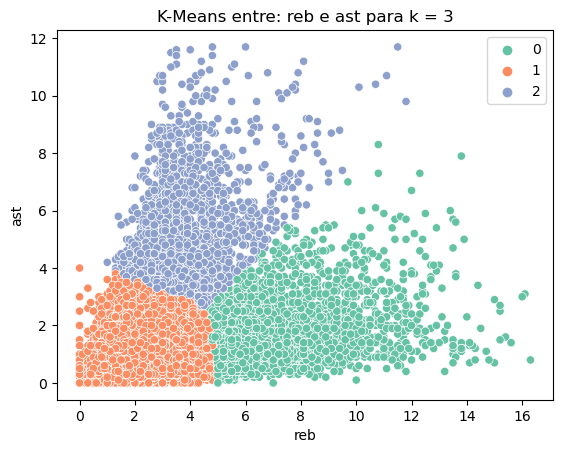

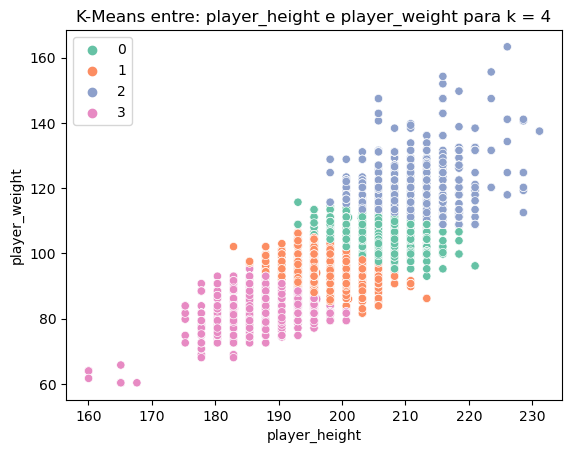

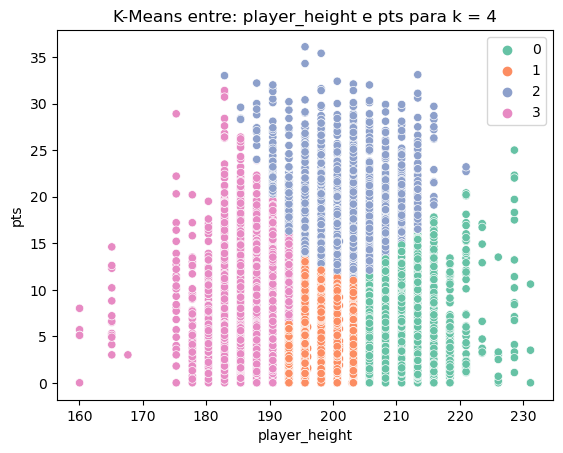

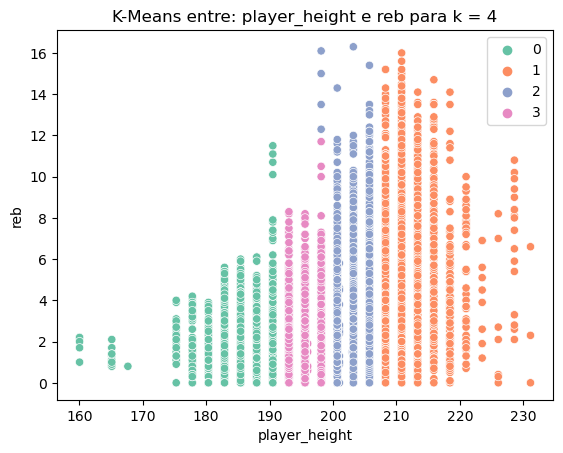

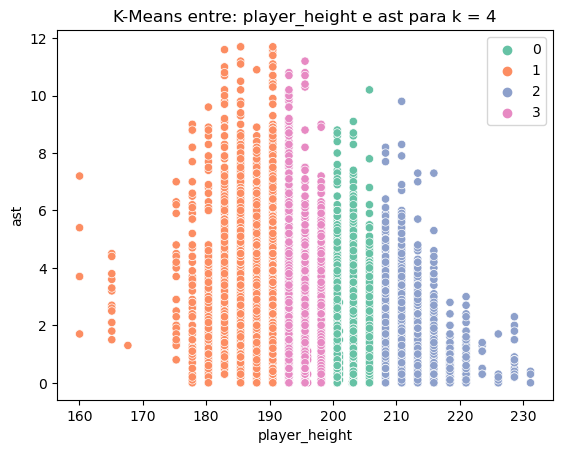

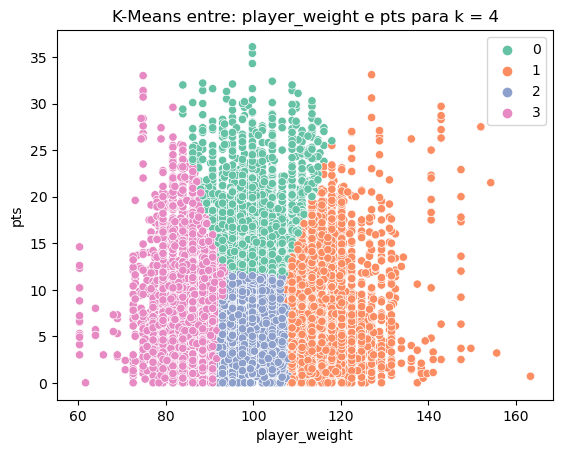

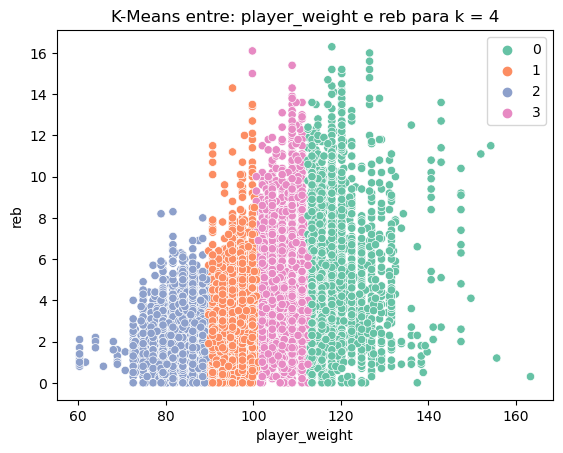

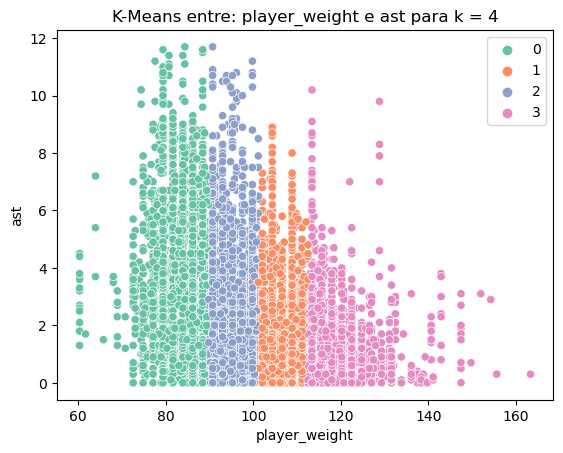

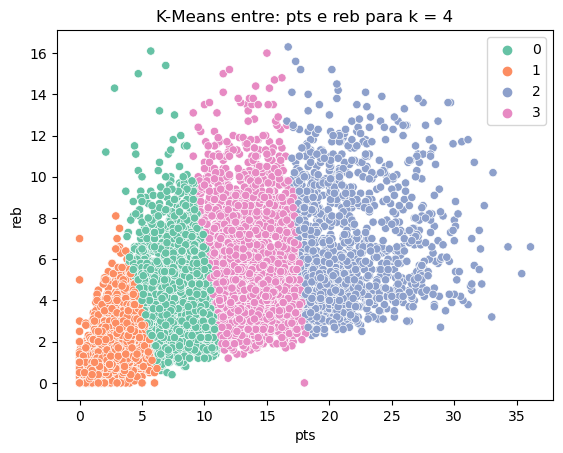

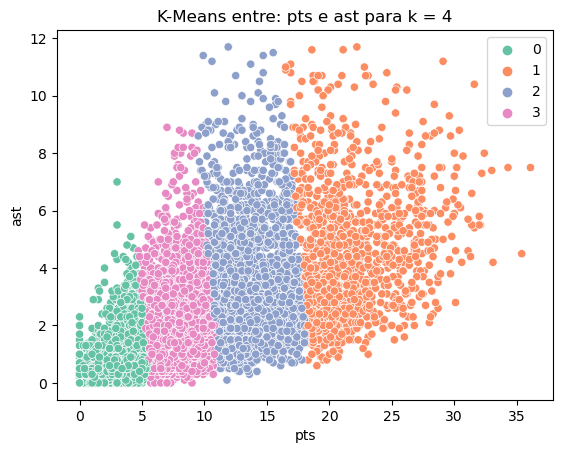

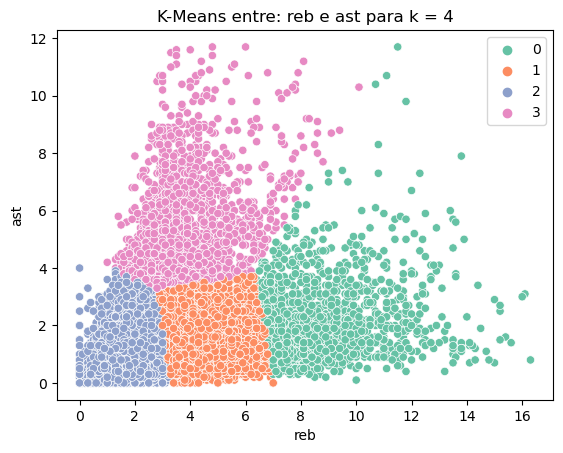

In [22]:
numerics = ["player_height","player_weight", "pts", "reb", "ast"]

for k in range(3,5):
      kmeans = KMeans(n_clusters=k,n_init=10)
      for col1,col2 in combinations(numerics, 2):
            df_group = df[[col1, col2]]
            kmeans.fit(df_group)
            sns.scatterplot(data=df_group, x=col1, y=col2,palette="Set2" ,hue=kmeans.labels_)
            plt.title(f'K-Means entre: {col1} e {col2} para k = {k}')
            plt.show()